## Shared Micromobility Vehicle Trips Data Analysis

### Data Source and API
- AODP Dataset Access: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r
- API Endpoint: https://data.austintexas.gov/resource/7d8e-dm7r.json
- API Documentation: https://dev.socrata.com/foundry/data.austintexas.gov/7d8e-dm7r

To access the dataset host, install SODA API first:
    `pip install sodapy`

### Data Extraction

- Data Provided
    - trip_id
    - device_id
    - modified_date
    - council_district_start
    - council_district_end
    - vehicle_type
    - trip_duration
    - trip_distance
    - start_time
    - end_time
    - month
    - hour
    - day_of_week
    - year
    - census_geoid_start
    - census_geoid_end

In [1]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
#import seaborn as sns
import pandas as pd
from sodapy import Socrata

In [2]:
# Output File (CSV)
output_data_file = "Output_Data/shared_mobility.csv"

In [3]:
# url = https://data.austintexas.gov/resource/7d8e-dm7r.json
# Data Extraction:
client = Socrata("data.austintexas.gov", None)

results = client.get("7d8e-dm7r", limit=1000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.head()

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305


In [5]:
# Check for missing values:
results_df.count()

trip_id                   1000
device_id                 1000
modified_date             1000
council_district_start    1000
council_district_end      1000
vehicle_type               999
trip_duration              999
trip_distance              999
start_time                 999
end_time                   999
month                      999
hour                       999
day_of_week                999
year                       999
census_geoid_start         998
census_geoid_end           998
dtype: int64

In [6]:
missing_vehicle_type = results_df["vehicle_type"].isnull().sum()
print(f"There are {missing_vehicle_type} missing vehicle types.")
missing_month = results_df["month"].isnull().sum()
print(f"There are {missing_month} missing months.")
missing_census_geoid_start = results_df["census_geoid_start"].isnull().sum()
print(f"There are {missing_census_geoid_start} missing census_geoid_start.")

There are 1 missing vehicle types.
There are 1 missing months.
There are 2 missing census_geoid_start.


### Data Cleaning

In [7]:
clean_results_df = results_df.copy()

In [8]:
clean_results_df

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1e0bd378-ea60-49e4-babe-8f27ee26e02a,394e7a8b-0d76-41b0-93d4-98ba9ecb13d1,2019-06-02T23:45:27.000,9,9,scooter,292,567,2019-06-01T22:45:00.000,2019-06-01T22:45:00.000,6,22,6,2019,48453001305,48453001401
996,6c29177d-2978-4d16-b013-3d6657e85500,f78faccd-8218-4bf0-92b0-5cc309fbebd6,2019-05-15T17:01:51.000,9,9,bicycle,138,450,2019-05-14T00:30:00.000,2019-05-14T00:30:00.000,5,0,2,2019,48453001100,48453001100
997,75a50782-933f-4eb2-a5b3-a8c570206503,6ba11e8b-42dc-4ba4-84eb-678155d278ea,2019-05-15T17:01:51.000,9,9,scooter,210,595,2019-05-14T02:15:00.000,2019-05-14T02:15:00.000,5,2,2,2019,48453000603,48453000603
998,0193c2cf-1c6c-4447-8f2f-f1cfccba3b92,0257125c-3d5b-4cab-baae-038ba9c17d8f,2019-05-15T17:36:46.000,9,9,scooter,134,209,2019-05-14T00:30:00.000,2019-05-14T00:30:00.000,5,0,2,2019,48453000604,48453000604


In [9]:
clean_results_df = clean_results_df.rename(columns = {
    "trip_id": "Trip ID",
    "device_id": "Device ID",
    "modified_date": "Data Modified Date",
    "vehicle_type": "Vehicle Type",
    "trip_duration": "Trip Duration",
    "trip_distance": "Trip Distance",
    "start_time": "Trip Start Time",
    "end_time": "Trip End Time",
    "hour": "Hour",
    "day_of_week": "Day Of Week",
    "month": "Month",
    "year": "Year",
    "census_geoid_start": "GEOID Start",
    "census_geoid_end": "GEOID End",
    "council_district_start": "Start Council District",
    "council_district_end" : "Return Council District"
})

In [10]:
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305


In [11]:
#Find the total number of scooter rides:
scooters = clean_results_df[clean_results_df["Vehicle Type"] == "scooter"]
total_scooters = len(clean_results_df) - scooters.shape[0]
total_scooters

18

In [12]:
#Find the total number of bicycle rides:
bicycles = clean_results_df[clean_results_df["Vehicle Type"] == "bicycle"]
total_bicycles = len(clean_results_df) - bicycles.shape[0]
total_bicycles

983

In [13]:
#Check to tally the total rides 
total_rides = total_bicycles + total_scooters
total_rides

1001

In [14]:
# Drop all the null values
clean_results_df = clean_results_df.dropna(how='any')
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-28T02:42:07.000,9,9,scooter,644,1326,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001100
6,8353d103-166b-4958-aa7d-07c59cc8ef5c,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-28T02:42:07.000,3,1,scooter,419,1511,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453000902,48453000804


In [15]:
# Find the number of unique devices
device_id_list =  clean_results_df["Device ID"].value_counts()
device_id_list

bcaa8ccd-f833-4996-af95-73563524839b    4
063a0a15-1999-40e4-993f-b91a1444ba4a    3
d546e003-2eb9-40d2-89c9-26d845f66cff    3
821d4240-9d79-42f9-acd1-1a4c7c24fe91    3
4271b303-ca95-402c-918e-ca1a7c06f322    3
                                       ..
d5a50125-f446-410b-b40a-91935cbc4a2b    1
d38a81a9-fc33-432e-95d6-f955e9bc7a63    1
3e73dd91-98c6-41eb-a167-874c82953584    1
1c4c77ff-90d4-41f0-ba4c-0caba1bbd08a    1
937c137b-2074-4c4a-b241-423d9c1290b3    1
Name: Device ID, Length: 870, dtype: int64

In [16]:
# Find the number of unique GEOIDs where the trips started
start_geoid = clean_results_df["GEOID Start"].value_counts()
start_geoid

48453001100      428
48453001305      121
48453000902       53
48453001200       47
48453001303       40
48453000604       36
48453000603       34
48453000700       31
48453001401       30
48453000601       25
48453001911       22
48453001605       18
48453002304       16
48453001000       10
48453002308        8
48453000901        8
48453001602        7
48453000401        6
48453000204        4
48453001402        4
48453001304        4
48453001901        4
48453001308        4
48453002004        4
48453002317        4
48453000804        3
48453000402        3
48453000803        3
48453001307        3
48453001818        2
48453001604        2
48453002318        2
48453000203        2
48453000500        2
48453000306        1
48453002315        1
48453002313        1
48453000102        1
OUT_OF_BOUNDS      1
48453002003        1
48453002316        1
48453001403        1
Name: GEOID Start, dtype: int64

In [17]:
# Find the number of unique GEOIDs where the trips ended
end_geoid = clean_results_df["GEOID End"].value_counts()
end_geoid

48453001100    410
48453001305    103
48453001303     64
48453001200     49
48453000700     46
48453000902     45
48453000604     31
48453001911     28
48453000601     27
48453001605     25
48453000603     24
48453001401     19
48453001000     13
48453001308      8
48453001901      8
48453002304      8
48453000401      8
48453001602      8
48453000204      7
48453002317      5
48453001402      5
48453000402      5
48453002308      4
48453000302      4
48453000804      4
48453000901      4
48453000306      3
48453001604      3
48453000500      3
48453000803      3
48453001603      2
48453001304      2
48453002316      2
48453001919      2
48453002307      2
48453001818      2
48453002004      2
48453001307      2
48453002003      1
48453001505      1
48453000203      1
48453001606      1
48453002431      1
48453002314      1
48453000102      1
48453002313      1
Name: GEOID End, dtype: int64

In [18]:
# Change the time and date format for columns - 'Data Modified Date', 'Trip Start time' and 'Trip End Time'
clean_results_df['Trip Start Time'] = pd.to_datetime(clean_results_df['Trip Start Time'])
clean_results_df['Trip End Time'] = pd.to_datetime(clean_results_df['Trip End Time'])
clean_results_df['Data Modified Date'] = pd.to_datetime(clean_results_df['Data Modified Date'])
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28 02:42:07,1,9,scooter,678,2785,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28 02:42:07,9,5,scooter,713,2466,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28 02:42:07,9,9,scooter,469,1608,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001305
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-28 02:42:07,9,9,scooter,644,1326,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001100
6,8353d103-166b-4958-aa7d-07c59cc8ef5c,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-28 02:42:07,3,1,scooter,419,1511,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453000902,48453000804


### Visualization of the Clean Data Set

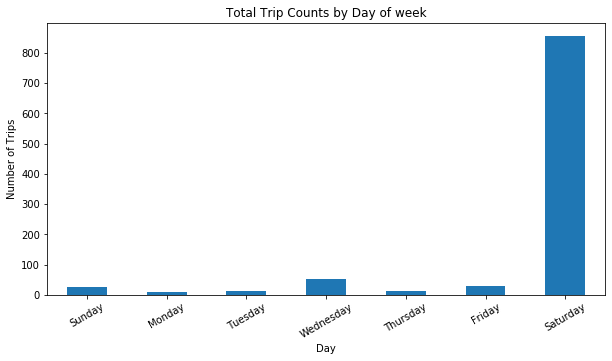

In [19]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(clean_results_df['Day Of Week'].value_counts().sort_index())

# Map day of week for better labels. Data documentation indicates "0=Sunday and so on.""
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_week.png")
plt.show()

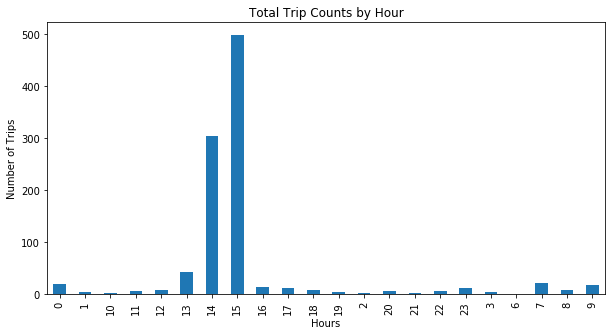

In [20]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(clean_results_df['Hour'].value_counts().sort_index())
#hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20','21','22','23']
#hours = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']
#hourly_total['Hours'] = hours

hourly_total.reset_index().plot(kind='bar', x='index', y='Hour', title='Total Trip Counts by Hour', figsize = (10,5), legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_hour.png")
plt.show()
#now shows correct plot but xticks not sorted

In [21]:
hourly_total

,Hour
0,19
1,4
10,2
11,6
12,7
13,43
14,305
15,498
16,13
17,12


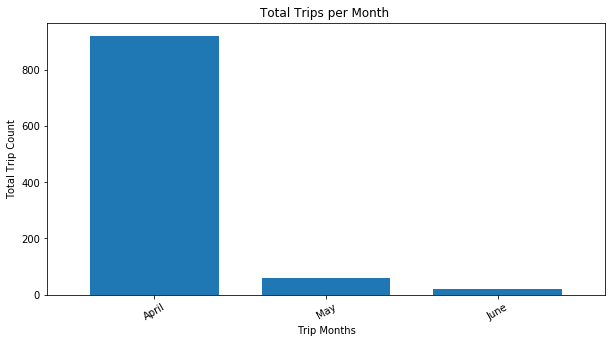

In [22]:
monthly_total = pd.DataFrame(clean_results_df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]
monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",width = 0.75,figsize = (10,5),rot = 30, legend = False)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Trip Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("Plots/trips_per_month1.png")
plt.show()
#shows correct plot but xticks not sorted

In [23]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total['Months'] = month_list
monthly_total.reset_index().plot(kind='bar', x='index', y='Month', title='Total Trip Counts by months', figsize = (10,5), legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_month2.png")
plt.show()
#This graph seems to give wrong mapped values

ValueError: Length of values does not match length of index

In [ ]:
# Count how many trips started in each census GEOID tract
census_trip_start['Total Trips'] = pd.DataFrame(clean_results_df['GEOID Start'].value_counts())

# Count how many trips ended in each census tract
census_trip_end = pd.DataFrame(clean_results_df['GEOID End'].value_counts())

plt.bar(clean_results_df["GEOID Start"], census_trip_start ['Total Trips'])
plt.title("Total Count of trips starting per Census Tract")
plt.xlabel("GEOID ID")
plt.ylabel("Total Trips")

plt.show()